# Problema veleta-generador
Orientar un generador en la dirección del viento.

Variables de entrada:
- Posición de la veleta respecto al norte en dirección horaria hasta 359° [°]
- Posición del generador respecto al norte en dirección horaria hasta 359° [°]

Variables de salida:
- Velocidad 0-600 [Hz]
- Sentido de giro 0(antihorario)-1(no mover)-2(horario)

## Librerías
Para esta práctica se usó la librería [fuzzylogic](https://fuzzylogic.readthedocs.io/en/latest/) y funcionó muy bien, aceleró el desarrollo más de lo esperado con sus funciones e utilidades.

In [1]:
from matplotlib import pyplot
from fuzzylogic.classes import Domain
from fuzzylogic.functions import trapezoid

In [75]:
# Función para generalizar los conjuntos de las posiciones de generador y veleta.
# +-25° desde central y 30° de cola en cada lado
def gen_trapezoid(central):
    certain_degrees = 25
    uncertain_degrees = 30
    return trapezoid(central - certain_degrees - uncertain_degrees,
                     central - certain_degrees,
                     central + certain_degrees,
                     central + certain_degrees + uncertain_degrees
                    )

## Universos

### Entrada

In [3]:
upg = Domain("Posición generador", 0, 359)
upv = Domain("Posición veleta", 0, 359)

#### Posición del generador

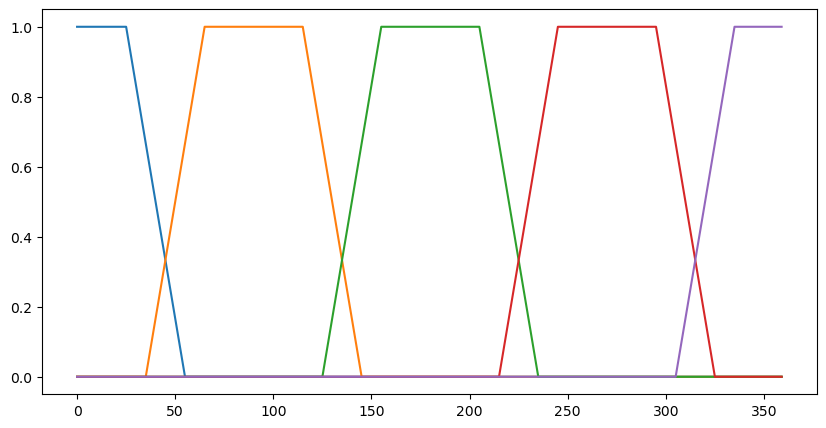

In [4]:
upg.norte_e = gen_trapezoid(0)
upg.este = gen_trapezoid(90)
upg.sur = gen_trapezoid(180)
upg.oeste = gen_trapezoid(270)
upg.norte_o = gen_trapezoid(360)

pyplot.rc("figure", figsize=(10,5))
upg.norte_e.plot()
upg.este.plot()
upg.sur.plot()
upg.oeste.plot()
upg.norte_o.plot()


#### Posición de la veleta

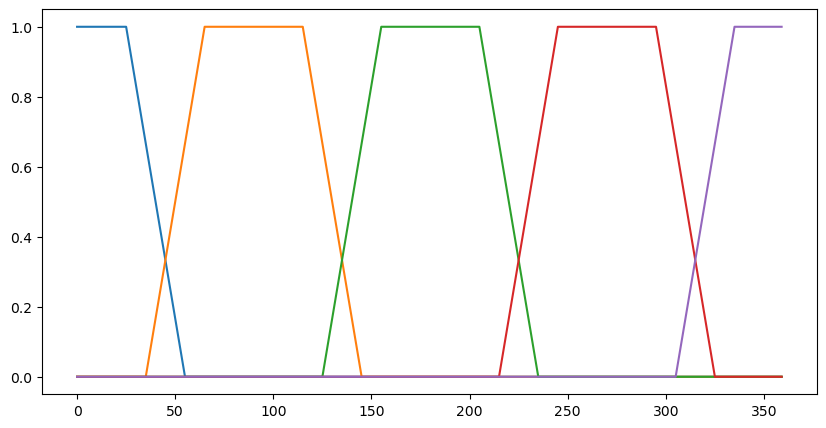

In [10]:
upv.norte_e = gen_trapezoid(0)
upv.este = gen_trapezoid(90)
upv.sur = gen_trapezoid(180)
upv.oeste = gen_trapezoid(270)
upv.norte_o = gen_trapezoid(360)

pyplot.rc("figure", figsize=(10,5))
upv.norte_e.plot()
upv.este.plot()
upv.sur.plot()
upv.oeste.plot()
upv.norte_o.plot()

### Salida

In [6]:
uv = Domain("Velocidad",0, 600)
usg = Domain("Sentido de giro",0, 2,res=0.1)

#### Velocidad

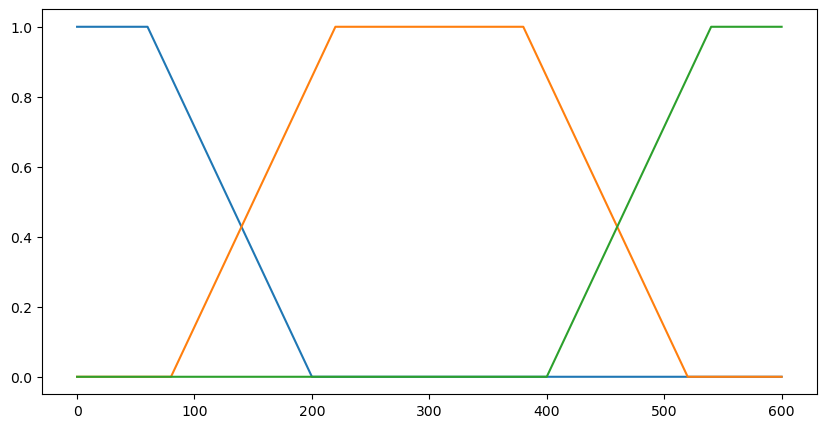

In [7]:
uv.baja = trapezoid(-1,0, 60,200)
uv.media = trapezoid(80,220, 380,520)
uv.alta = trapezoid(400,540, 600,601)

pyplot.rc("figure", figsize=(10,5))
uv.baja.plot()
uv.media.plot()
uv.alta.plot()

#### Sentido de giro

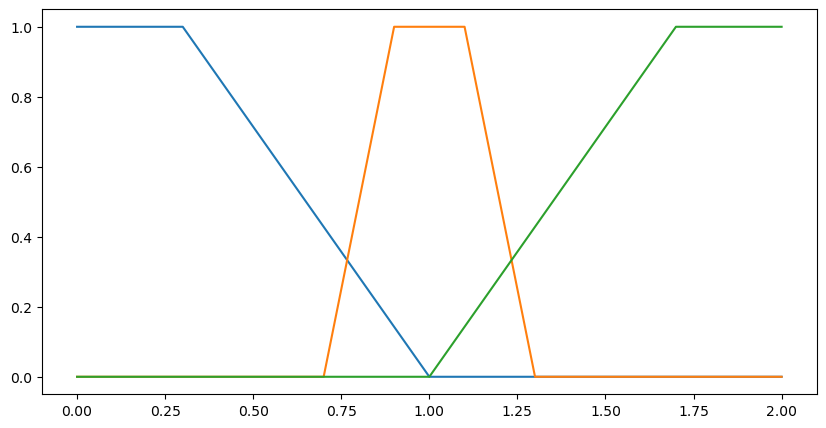

In [8]:
usg.antihorario = trapezoid( -1,   0, 0.3,  1)
usg.nomover =     trapezoid(0.7, 0.9, 1.1,1.3)
usg.horario =     trapezoid(  1, 1.7,   2,2.1)

pyplot.rc("figure", figsize=(10,5))
usg.antihorario.plot()
usg.nomover.plot()
usg.horario.plot()

## Tabla de inferencia
En esta sección se usa la función `rule_from_table` para importar una tabla de inferencia desde cadena de texto, la cual con ayuda librerías externas pudimos generar facilmente a partir de una tabla de excel. Esta función es de gran utilidad para leerlo, pero aplicable solo en sistemas de 2 entradas.

El formato de la tabla es simple, la primer columna y la primera fila, son los universos de entrada y en cada entrada llevan cada uno de los conjuntos, todo esto refiriendonos a su representación en el código. 

`upg`: Universo de posición del generador
`upv`: Universo de posición de la veleta

Posteriormente en cada una de las intersecciones se pone el conjunto de salida dadas las entradas de los conjuntos `upv.aaaa` y `upg.bbbb`. Y listo, pasamos la cadena de texto por la función rule_from_table y se genera nuestro sistema de inferencia que directamente le pasamos los valores de entrada y **nos devuelve el valor de salida desdifusificado**.

Referencia: [FuzzyLogic - Inference](https://fuzzylogic.readthedocs.io/en/latest/Showcase/#inference)

Nota: omitir las advertencias en esta sección, no afectan en la ejecución (ya se hizo un Pull Request en el repositorio de la librería donde se resuelve)

In [27]:
from fuzzylogic.classes import rule_from_table
tabla_velocidad = """
            upg.norte_e upg.este  upg.sur upg.oeste upg.norte_o
upv.norte_e     uv.baja uv.media  uv.alta  uv.media     uv.baja
   upv.este    uv.media  uv.baja uv.media   uv.alta    uv.media
    upv.sur     uv.alta uv.media  uv.baja  uv.media     uv.alta
  upv.oeste    uv.media  uv.alta uv.media   uv.baja    uv.media
upv.norte_o     uv.baja uv.media  uv.alta  uv.media     uv.baja
"""
velocidad = rule_from_table(tabla_velocidad, globals())

tabla_sentido = """
                upg.norte_e        upg.este         upg.sur       upg.oeste     upg.norte_o
upv.norte_e     usg.nomover usg.antihorario usg.antihorario     usg.horario     usg.nomover
   upv.este     usg.horario     usg.nomover usg.antihorario     usg.horario     usg.horario
    upv.sur     usg.horario     usg.horario     usg.nomover usg.antihorario usg.antihorario
  upv.oeste usg.antihorario usg.antihorario     usg.horario     usg.nomover usg.antihorario
upv.norte_o     usg.nomover usg.antihorario     usg.horario     usg.horario     usg.nomover
"""
sentido = rule_from_table(tabla_sentido, globals())

C:\Users\Keb\miniconda3\envs\jupyter-env\Lib\site-packages\fuzzylogic\classes.py:468: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(io.StringIO(table), delim_whitespace=True)
C:\Users\Keb\miniconda3\envs\jupyter-env\Lib\site-packages\fuzzylogic\classes.py:468: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(io.StringIO(table), delim_whitespace=True)


In [42]:
test = {upv: 0, upg: 1}
print(velocidad(test), sentido(test))

70.88951364583929 0.9523809523809523


## Superficies de control

In [70]:
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [71]:
upgg, upvv = np.meshgrid(upg.range, upv.range)
mesh1 = np.ndarray((len(upgg), len(upvv)))
mesh2 = np.ndarray((len(upvv), len(upvv)))

for i in range(len(xx)):
    for j in range(len(yy)):
        mesh1[i][j] = velocidad({upg: upgg[i][j], upv: upvv[i][j]})
        mesh2[i][j] = sentido({upg: upgg[i][j], upv: upvv[i][j]})

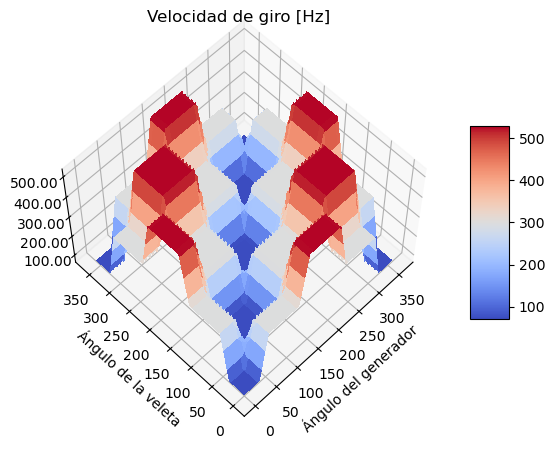

In [74]:

fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(upgg, upvv, mesh1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(elev=60,azim=-135)

# Customize the z axis.
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

pyplot.xlabel("Ángulo del generador")
pyplot.ylabel("Ángulo de la veleta")
pyplot.title("Velocidad de giro [Hz]")
pyplot.show()

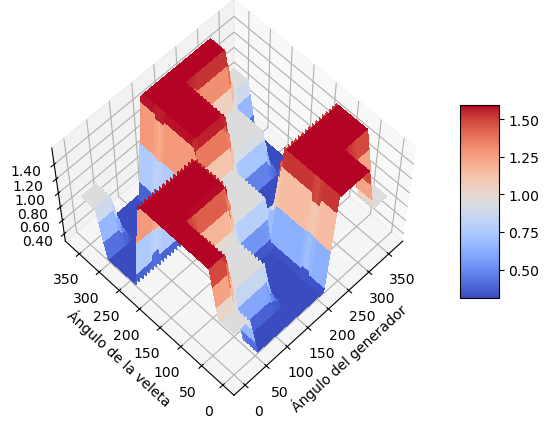

In [73]:
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(upgg, upvv, mesh2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(elev=60,azim=-135)

# Customize the z axis.
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

pyplot.xlabel("Ángulo del generador")
pyplot.ylabel("Ángulo de la veleta")
pyplot.show()